###SGD

In [ ]:
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, params, grads):
        for param, grad in zip(params, grads):
            param -= self.learning_rate * grad


###ADAM algorithm

In [ ]:
import numpy as np

class Adam:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m = [np.zeros_like(param) for param in params]
        if self.v is None:
            self.v = [np.zeros_like(param) for param in params]

        self.t += 1
        lr_t = self.learning_rate * np.sqrt(1 - self.beta2 ** self.t) / (1 - self.beta1 ** self.t)

        for i, (param, grad) in enumerate(zip(params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * grad ** 2

            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)

            param -= lr_t * m_hat / (np.sqrt(v_hat) + self.epsilon)


####NADAM algorithm

In [ ]:
import numpy as np

class Nadam:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m = [np.zeros_like(param) for param in params]
        if self.v is None:
            self.v = [np.zeros_like(param) for param in params]

        self.t += 1
        lr_t = self.learning_rate * np.sqrt(1 - self.beta2 ** self.t) / (1 - self.beta1 ** self.t)

        for i, (param, grad) in enumerate(zip(params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * grad
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * grad ** 2

            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)

            m_bar = self.beta1 * m_hat + (1 - self.beta1) * grad / (1 - self.beta1 ** self.t)

            param -= lr_t * m_bar / (np.sqrt(v_hat) + self.epsilon)


####ADAgrad algorithm

In [ ]:
import numpy as np

class Adagrad:
    def __init__(self, learning_rate=0.01, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.G = None

    def update(self, params, grads):
        if self.G is None:
            self.G = [np.zeros_like(param) for param in params]

        for i, (param, grad) in enumerate(zip(params, grads)):
            self.G[i] += grad ** 2
            adjusted_learning_rate = self.learning_rate / (np.sqrt(self.G[i]) + self.epsilon)
            param -= adjusted_learning_rate * grad


####Testing on three benchmark functions

In [ ]:
import numpy as np

def rosenbrock(x):
    return sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

def rastrigin(x):
    return 10 * len(x) + sum(x**2 - 10 * np.cos(2 * np.pi * x))

def ackley(x):
    n = len(x)
    return -20 * np.exp(-0.2 * np.sqrt(sum(x**2) / n)) - np.exp(sum(np.cos(2 * np.pi * x)) / n) + 20 + np.e


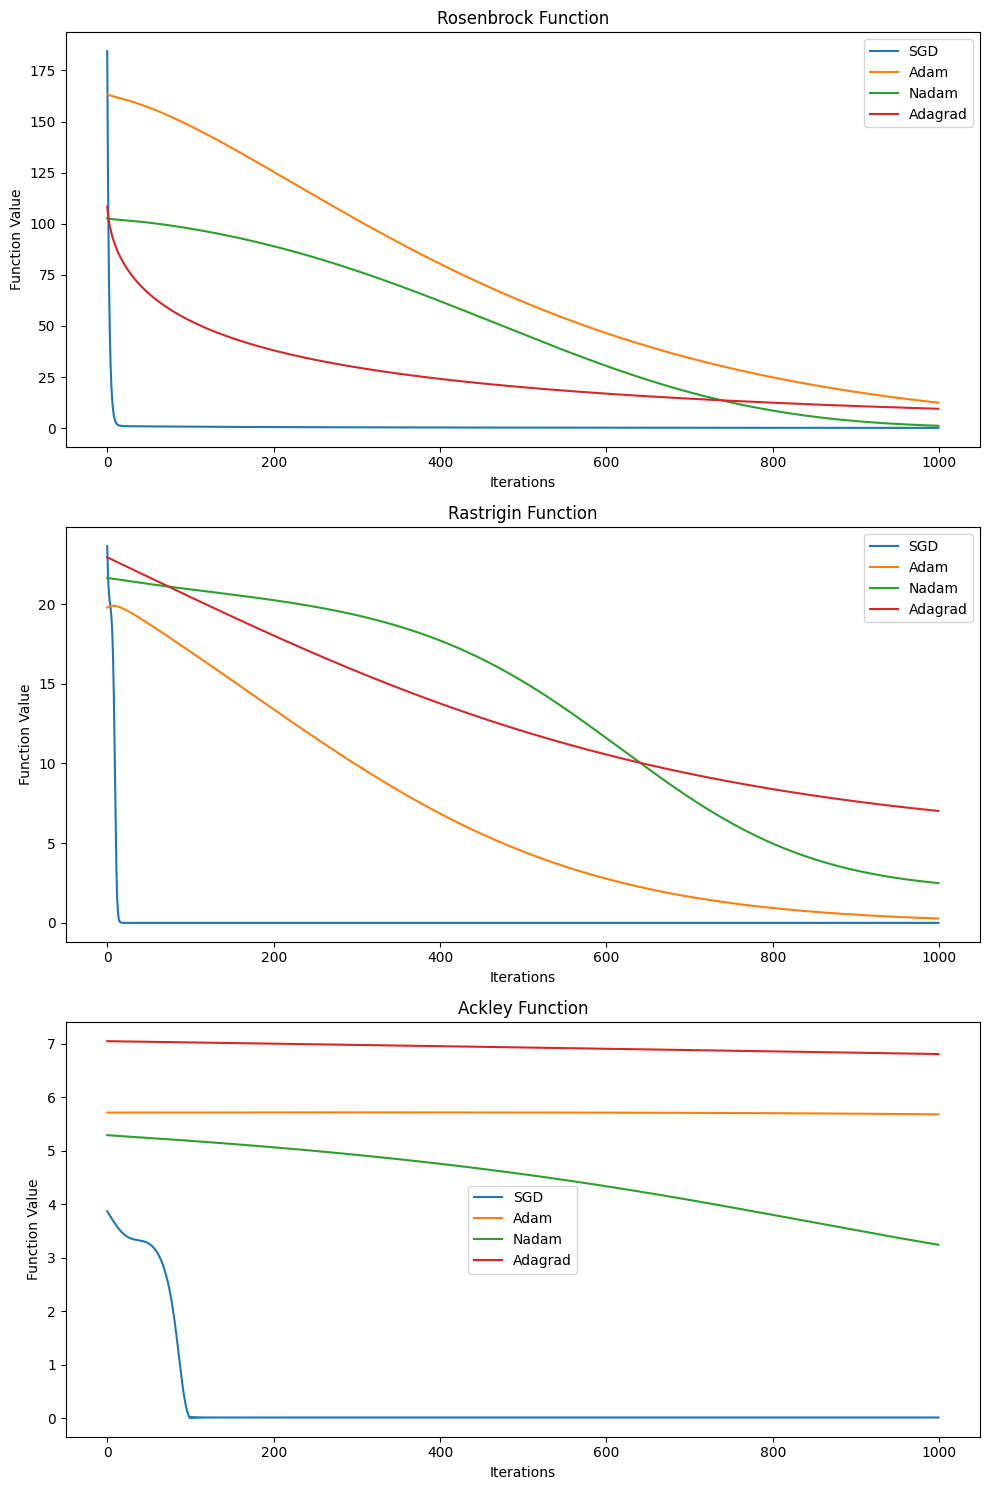

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient functions
def rosenbrock_grad(x):
    grad = np.zeros_like(x)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    grad[1] = 200 * (x[1] - x[0]**2)
    return grad

def rastrigin_grad(x):
    return 2 * x + 20 * np.pi * np.sin(2 * np.pi * x)

def ackley_grad(x):
    n = len(x)
    term1 = np.sqrt(np.sum(x**2) / n)
    term2 = np.sum(np.cos(2 * np.pi * x)) / n
    grad1 = x / (n * np.sqrt(np.sum(x**2))) * 20 * np.exp(-0.2 * term1)
    grad2 = 2 * np.pi * np.sin(2 * np.pi * x) * np.exp(term2) / n
    return grad1 + grad2

# Optimization function
def test_optimizer(optimizer, func, grad_func, n_dim=2, n_iter=1000):
    x = np.random.randn(n_dim)
    values = []
    for _ in range(n_iter):
        values.append(func(x))
        grads = [grad_func(x)]
        optimizer.update([x], grads)
    return values

# Parameters
n_dim = 2
n_iter = 1000

# Instantiate optimizers
optimizers = {
    "SGD": SGD(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001),
    "Nadam": Nadam(learning_rate=0.001),
    "Adagrad": Adagrad(learning_rate=0.01)
}

# Benchmark functions
functions = {
    "Rosenbrock": (rosenbrock, rosenbrock_grad),
    "Rastrigin": (rastrigin, rastrigin_grad),
    "Ackley": (ackley, ackley_grad)
}

# Plotting results
fig, axs = plt.subplots(len(functions), 1, figsize=(10, 15))

for idx, (func_name, (func, grad_func)) in enumerate(functions.items()):
    for opt_name, optimizer in optimizers.items():
        values = test_optimizer(optimizer, func, grad_func, n_dim, n_iter)
        axs[idx].plot(values, label=opt_name)

    axs[idx].set_title(f"{func_name} Function")
    axs[idx].set_xlabel("Iterations")
    axs[idx].set_ylabel("Function Value")
    axs[idx].legend()

plt.tight_layout()
plt.show()
